In [81]:
# Machine learning classification libraries
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
 
# For data manipulation
import pandas as pd
import numpy as np
 
# To plot
import matplotlib.pyplot as plt
import seaborn

# Train Test Split
from sklearn.model_selection import train_test_split

In [111]:
# read the data
d=pd.read_excel("D:\GoogleDrive\custom Codes\TechAnalyis\Book3.xlsx")

In [113]:
d.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
0,2018-08-16,1JANATAMF,6.2,6.3,6.1,6.2,6.2,6.2,56,0.757,122741
1,2018-08-16,1STPRIMFMF,11.2,11.2,10.9,11.0,11.1,10.9,145,2.640,238810
2,2018-08-16,AAMRANET,80.1,80.4,78.5,78.5,79.7,78.3,545,15.488,195035
3,2018-08-16,AAMRATECH,30.8,31.6,30.7,31.0,30.9,31.0,195,5.100,164899
4,2018-08-16,ABB1STMF,6.1,6.1,5.9,6.0,6.1,6.0,109,11.214,1857588


In [114]:
# get the names of the columns
d.columns

Index(['DATE ', 'TRADING CODE ', 'LTP', 'HIGH ', 'LOW ', 'OPENP', 'CLOSEP',
       'YCP ', 'TRADE ', 'VALUE (mn) ', 'VOLUME'],
      dtype='object')

In [115]:
# strip the blank spaces from column names
d.rename(columns=lambda x: x.strip(), inplace=True)

In [116]:
d.columns

Index(['DATE', 'TRADING CODE', 'LTP', 'HIGH', 'LOW', 'OPENP', 'CLOSEP', 'YCP',
       'TRADE', 'VALUE (mn)', 'VOLUME'],
      dtype='object')

In [117]:
# clear the instrument names
d['TRADING CODE']=d['TRADING CODE'].str.strip()

In [8]:
#d['TRADING CODE'].value_counts()

In [118]:
# select the desired instrument and sor the data according to closing prices (ascending order)
da=d[(d['TRADING CODE']=='GP')].sort_values('DATE', ascending=True).reset_index(drop=True)
da=da[da['TRADE']!=0]

In [119]:
da.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
0,2017-01-01,GP,281.5,285.0,281.5,283.5,283.0,284.1,351,23.074,81413
1,2017-01-02,GP,284.8,286.0,282.0,282.0,283.8,283.0,697,59.162,207796
2,2017-01-03,GP,284.0,287.0,283.5,284.0,285.8,283.8,772,145.994,510520
3,2017-01-04,GP,288.0,289.9,286.1,286.1,288.6,285.8,895,123.801,431195
4,2017-01-05,GP,288.0,291.7,286.5,290.0,287.6,288.6,656,76.176,263372


Text(0.5,1,'Time Series Plot of GP')

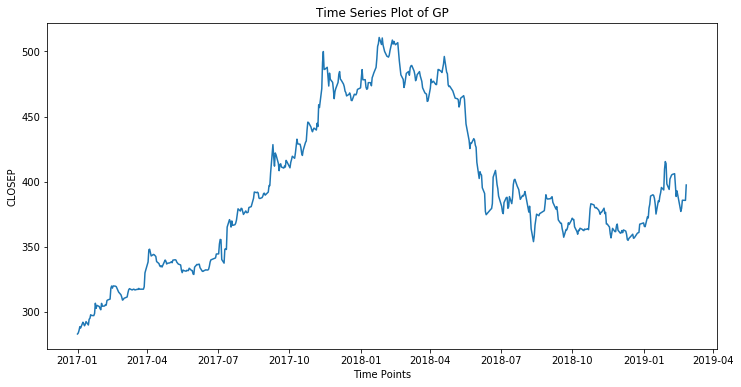

In [120]:
# draw a time series plot
plt.figure(figsize=(12,6))
plt.plot(da['DATE'], da['CLOSEP'])
plt.xlabel('Time Points')
plt.ylabel('CLOSEP')
plt.title('Time Series Plot of '+da.loc[1, 'TRADING CODE'])

In [121]:
# Draw the Candlestick plot
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

In [122]:
init_notebook_mode(connected=True)
trace = go.Candlestick(x=da['DATE'],
                       open=da['OPENP'],
                       high=da['HIGH'],
                       low=da['LOW'],
                       close=da['CLOSEP'])

dat=[trace]
iplot(dat)

In [123]:
# Create the features
# we believe that today's CLOSEP-OPENP and HIGH-LOW affect tomorrow's CLOSEP
da['HIGH-LOW']=da['HIGH']-da['LOW']
da['CLOSEP-OPENP']=da['CLOSEP']-da['OPENP']
da.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP
0,2017-01-01,GP,281.5,285.0,281.5,283.5,283.0,284.1,351,23.074,81413,3.5,-0.5
1,2017-01-02,GP,284.8,286.0,282.0,282.0,283.8,283.0,697,59.162,207796,4.0,1.8
2,2017-01-03,GP,284.0,287.0,283.5,284.0,285.8,283.8,772,145.994,510520,3.5,1.8
3,2017-01-04,GP,288.0,289.9,286.1,286.1,288.6,285.8,895,123.801,431195,3.8,2.5
4,2017-01-05,GP,288.0,291.7,286.5,290.0,287.6,288.6,656,76.176,263372,5.2,-2.4


Text(0.5,1,'Histogram of CLOSEP-OPENP')

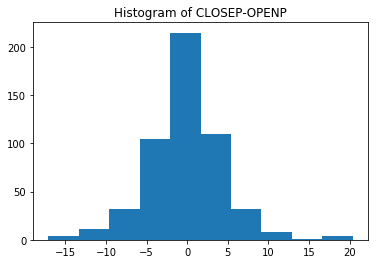

In [124]:
# check the distribution of the features
plt.hist(da['CLOSEP-OPENP'])
plt.title('Histogram of CLOSEP-OPENP')

Text(0.5,1,'Histogram of HIGH-LOW')

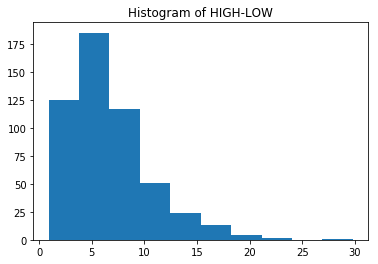

In [125]:
plt.hist(da['HIGH-LOW'])
plt.title('Histogram of HIGH-LOW')

In [126]:
da.head()
#print(da.shape)

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP
0,2017-01-01,GP,281.5,285.0,281.5,283.5,283.0,284.1,351,23.074,81413,3.5,-0.5
1,2017-01-02,GP,284.8,286.0,282.0,282.0,283.8,283.0,697,59.162,207796,4.0,1.8
2,2017-01-03,GP,284.0,287.0,283.5,284.0,285.8,283.8,772,145.994,510520,3.5,1.8
3,2017-01-04,GP,288.0,289.9,286.1,286.1,288.6,285.8,895,123.801,431195,3.8,2.5
4,2017-01-05,GP,288.0,291.7,286.5,290.0,287.6,288.6,656,76.176,263372,5.2,-2.4


In [127]:
da['CLOSEP']=da['CLOSEP'].astype('float64')

In [128]:
# create the return series of CLOSEP
da['Y']=da['CLOSEP'][1:]/da['CLOSEP'][:-1].values-1

In [129]:
da.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP,Y
0,2017-01-01,GP,281.5,285.0,281.5,283.5,283.0,284.1,351,23.074,81413,3.5,-0.5,NaN
1,2017-01-02,GP,284.8,286.0,282.0,282.0,283.8,283.0,697,59.162,207796,4.0,1.8,0.002827
2,2017-01-03,GP,284.0,287.0,283.5,284.0,285.8,283.8,772,145.994,510520,3.5,1.8,0.007047
3,2017-01-04,GP,288.0,289.9,286.1,286.1,288.6,285.8,895,123.801,431195,3.8,2.5,0.009797
4,2017-01-05,GP,288.0,291.7,286.5,290.0,287.6,288.6,656,76.176,263372,5.2,-2.4,-0.003465


In [130]:
# if todays CLOSEP is greater than yesterday's CLOSEP, 1, else -1
da.loc[da['Y']>0, 'DEX']=1
da.loc[da['Y']<=0, 'DEX']=-1

#  we shifted the values of DEX up one step for the sake of model fitting, i.e tomorrow's DEX is inline with today's features
da['DEX']=da['DEX'].shift(-1)
da.head()
da.tail()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME,HIGH-LOW,CLOSEP-OPENP,Y,DEX
523,2019-02-18,GP,377.0,379.7,371.2,377.0,377.1,389.9,1877,157.754,419542,8.5,0.1,-0.032829,1.0
524,2019-02-19,GP,381.3,382.4,368.0,376.0,379.5,377.1,1793,240.682,644500,14.4,3.5,0.006364,1.0
525,2019-02-20,GP,386.0,389.4,377.6,379.5,385.7,379.5,1177,79.150,205386,11.8,6.2,0.016337,-1.0
526,2019-02-24,GP,386.4,386.7,380.1,386.0,385.6,385.7,689,46.392,120496,6.6,-0.4,-0.000259,1.0
527,2019-02-25,GP,398.0,399.6,386.2,386.8,397.4,385.6,2686,301.385,762762,13.4,10.6,0.030602,NaN


Text(0,0.5,'Count')

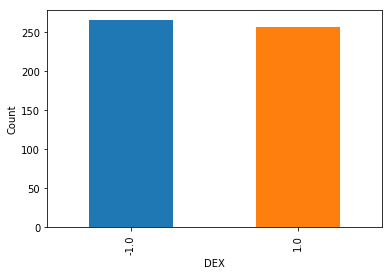

In [131]:
# bar plot of the Target variable
da.groupby(['DEX'])['CLOSEP'].count().plot(kind='bar')
plt.ylabel('Count')

In [132]:
# remove the rows with missing values
da=da.dropna()

In [133]:
# set the feature and target variables
y=da['DEX']
X=da[['CLOSEP-OPENP', 'HIGH-LOW']]

In [134]:
# set the train set size
pc=.90
j=int(pc*len(da['DEX']))

In [135]:
# train test split of features
X_train=X[:j]
X_test=X[j:]

In [136]:
# train test split of target variable
y_train=y[:j]
y_test=y[j:]

In [137]:
# set the Support vector classifier model
dex=SVC().fit(X_train, y_train)

In [138]:
# predict the test set values
y_pred=dex.predict(X_test)
len(y_pred)
y_pred

array([-1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.])

In [139]:
# get the confusion matrix for test set
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  7],
       [13, 17]], dtype=int64)

In [140]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.54      0.68      0.60        22
        1.0       0.71      0.57      0.63        30

avg / total       0.64      0.62      0.62        52



In [141]:
# get the confusion matrix for train set
y_p=dex.predict(X_train)
confusion_matrix(y_train,y_p )

array([[179,  64],
       [ 78, 147]], dtype=int64)

In [142]:
ac=accuracy_score(y_test, y_pred)
bc=accuracy_score(y_train, y_p)
print('The accuracy of the SVC Model in Test Set is: %.3f' % (ac))
print('The accuracy of the SVC Model in Train Set is: %.3f' % (bc))

The accuracy of the SVC Model in Test Set is: 0.615
The accuracy of the SVC Model in Train Set is: 0.697


In [143]:
# now look for better parameter combination
from sklearn.model_selection import GridSearchCV

# the rangne of parameter to check
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [144]:
# search over the provided range
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

# fit the model with best parameter set
grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   27.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [145]:
# get the best parameter
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [146]:
# predict for the test set
predic = grid.predict(X_test)

In [147]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(confusion_matrix(y_train, y_p))

             precision    recall  f1-score   support

       -1.0       0.42      0.36      0.39        22
        1.0       0.58      0.63      0.60        30

avg / total       0.51      0.52      0.51        52

[[ 8 14]
 [11 19]]
[[179  64]
 [ 78 147]]
